## Workflow to analyze pyControl data

### Imports

In [1]:
# Import Session and Experiment class with helper functions
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


### Variables

In [2]:
import pandas as pd

trial_window = [-2000, 6000] # in ms


# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder, _ = os.path.split(os.path.split(os.getcwd())[0])

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params/tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [3]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


# Optional

1m 7s

In [4]:
photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

root_folders = [photo_root_dir, pycontrol_root_dir]
horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

copy_files_to_horizontal_folders(
    root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)


### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [7]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
# pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

Saved sessions loaded from: sessions.pkl


## retain only pavlovian sessions

In [20]:
exp_cohort.sessions = exp_cohort.get_sessions(task_names='pavlovian_nobar_nodelay')
# exp_cohort.save()
print(len(exp_cohort.sessions ))
exp_cohort.subject_IDs



169


[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

### Perform extraction of behavioural information by trial

3m 7.6s

In [9]:
# Process the whole experimental folder by trials
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, 
  blank_spurious_event='spout', blank_timelim=[0, 65])

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

No event  'spout'  found:  45 2022-04-27 15:57:48 pavlovian_nobar_nodelay
No event  'spout'  found:  42 2022-04-28 12:53:21 pavlovian_nobar_nodelay
No event  'spout'  found:  45 2022-05-06 12:27:18 pavlovian_nobar_nodelay
No event  'spout'  found:  47 2022-07-25 17:06:18 pavlovian_nobar_nodelay
No event  'bar'  found:  48 2022-07-25 17:06:18 pavlovian_nobar_nodelay
No event  'bar_off'  found:  48 2022-07-25 17:06:18 pavlovian_nobar_nodelay
No event  'spout'  found:  48 2022-07-25 17:06:18 pavlovian_nobar_nodelay
No event  'spout'  found:  48 2022-07-25 17:07:44 pavlovian_nobar_nodelay
No event  'spout'  found:  50 2022-07-25 17:26:51 pavlovian_nobar_nodelay
No event  'spout'  found:  53 2022-07-25 17:44:00 pavlovian_nobar_nodelay
No event  'bar'  found:  49 2022-07-26 15:19:52 pavlovian_nobar_nodelay
No event  'bar_off'  found:  49 2022-07-26 15:19:52 pavlovian_nobar_nodelay
No event  'spout'  found:  49 2022-07-26 15:19:52 pavlovian_nobar_nodelay
No event  'spout'  found:  48 2022-07-

In [10]:
len(exp_cohort.sessions)

169

In [11]:
exp_cohort.sessions[1].df_events.head(50)

,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time
trial_nb,,,,,,,
1,6936,CS_Go,True,False,[],[],[]
2,20983,CS_Go,True,False,[],[],[]
3,33870,CS_Go,True,False,[],[],[]
4,45328,CS_Go,True,False,[],[],[]
5,57113,CS_Go,True,False,[],[],[]
6,71378,CS_Go,True,False,[],[],[]
7,83341,CS_Go,True,False,[],[],[]
8,97328,CS_Go,True,False,[],[],[]
9,108286,CS_Go,True,False,[],[],[]


# Define conditions and groups for extraction

## Pavlovian

In [13]:
# List of uncued conditions as listed on the tasks .csv file for task pavlovian_nobar_nodelay:
# free_reward_timer; reward spout cued; reward bar cued; reward bar_off; reward spout uncued; reward bar uncued; reward free; reward free_uncued

# Many combinations possible
conditions_dict0 = {'success': True}
conditions_dict1 = {'success': False}


# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1]
# Aliases for conditions
cond_aliases = ['hit', 'miss']
# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)
trial_window = [-2000, 4000]


In [14]:
exp_cohort.sessions

Behaviour: Create a dataset

In [15]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names='pavlovian_nobar_nodelay',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)


Behaviour: Compute distribution

In [16]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-2000, 6000],
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
dist_as_continuous.filterout_subjects([0,1])

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [25]:
# # Get a list of the groups
# dist_as_continuous.get_groups()
# # Get a list of the variables
# dist_as_continuous.get_col_names()

# # reset previous filtering of the dataset
# dist_as_continuous.filter_reset()

# # exclude some conditions by IDs
# dist_as_continuous.filterout_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filterout_groups([])

# # exclude some subjects
# dist_as_continuous.filterout_subjects([0, 1])
# #     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# # filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# # To remove subjects who do not have trials
# # in all the conditions, if called after filter_min(),
# # will discard any subject who do not have the minimum number
# # of trials in all the conditions

# # dist_as_continuous.filter_if_not_in_all_cond()


Indicative preview of the behavioural metadata

In [17]:
dist_as_continuous.metadata_df.head(50)

,condition_ID,group_ID,subject_ID,session_nb,bar_trial_time,bar_off_trial_time,spout_trial_time,trial_ID,bar_dist,bar_off_dist,spout_dist,keep
0,0,0,41,2,"[55.0, 1481.0, 1701.0, 2131.0, 4888.0, 113.0, ...","[1409.0, 1504.0, 1943.0, 2176.0, 4903.0, 128.0...","[1011, 113, 8314, 9147, -940, -534, 124, 496, ...",0,"[0.3333333333333333, 0.0, 0.6666666666666666, ...","[0.0, 0.0, 1.3333333333333333, 0.3333333333333...","[0.0, 0.0, 0.6666666666666666, 0.3333333333333...",True
1,0,0,41,4,"[-522.0, 647.0, 2347.0, 3554.0, 4233.0, 4897.0...","[-614.0, 462.0, 662.0, 2362.0, 3570.0, 4248.0,...","[-583, 93, 67, 196, 248, 647, 2347, 3554, 4233...",1,"[0.1388888888888889, 0.0, 0.1388888888888889, ...","[0.1388888888888889, 0.1388888888888889, 0.138...","[0.1388888888888889, 0.0, 0.1388888888888889, ...",True
2,0,0,41,5,"[5127.0, 5314.0, 3559.0, -1078.0, 107.0, 6905....","[5014.0, 5245.0, 2918.0, -1830.0, 71.0, 128.0,...","[533, 707, 1033, 282, 2679, 4391, 4888, -326, ...",2,"[0.18518518518518517, 0.0, 0.0, 0.185185185185...","[0.37037037037037035, 0.18518518518518517, 0.0...","[0.18518518518518517, 0.0, 0.0, 0.185185185185...",True
3,0,0,41,6,"[242.0, 2857.0, 3616.0, 4276.0, 4914.0, 4940.0...","[227.0, 257.0, 3449.0, 4210.0, 4868.0, 4929.0,...","[502, 1913, 513, 1920, 3086, 366, 1815, 3214, ...",3,"[0.058823529411764705, 0.0, 0.0588235294117647...","[0.058823529411764705, 0.0, 0.0, 0.05882352941...","[0.29411764705882354, 0.11764705882352941, 0.1...",True
4,0,0,41,7,"[192.0, 1154.0, 3306.0, -930.0, -704.0, 4331.0...","[1106.0, 1233.0, -994.0, -749.0, 171.0, 4363.0...","[1438, 2126, 2512, 2661, 2771, -42, 335, 509, ...",4,"[0.39603960396039606, 0.49504950495049505, 0.2...","[0.39603960396039606, 0.39603960396039606, 0.2...","[0.0, 0.297029702970297, 0.297029702970297, 0....",True
5,0,0,41,8,"[3756.0, 3752.0, 3806.0, 5669.0, 5916.0, 161.0...","[243.0, -593.0, 3767.0, 181.0, 5893.0, -1132.0...","[482, 1800, 2595, 3003, 3283, -255, 384, 1766,...",5,"[0.3067484662576687, 0.12269938650306748, 0.0,...","[0.06134969325153374, 0.06134969325153374, 0.1...","[0.18404907975460122, 0.3067484662576687, 0.18...",True
6,0,0,42,1,"[1421, 2388, 2408, 9158, 9178, 9238, 9258, 927...","[1436, 2403, 2423, 9173, 9193, 9253, 9273, 929...",[68],6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
7,0,0,42,2,[],[],[519],7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
8,0,0,42,4,"[678.0, 732.0, 1242.0, 1714.0, 2091.0, 2125.0,...","[245.0, 712.0, 1227.0, 1328.0, 1729.0, 2106.0,...","[1487, 1855, 193, 755, 967, 5506, 5526, 5546, ...",8,"[0.5, 0.0, 2.0, 1.0, 0.0, 0.5, 0.5, 0.5, 1.0, ...","[0.5, 0.0, 2.0, 0.5, 1.0, 0.5, 1.0, 0.0, 1.0, ...","[1.0, 0.5, 0.0, 1.5, 0.5, 0.5, 2.0, 0.5, 2.5, ...",True
9,0,0,42,5,"[-2.0, 391.0, 435.0, 486.0, 594.0, 667.0, 707....","[13.0, 406.0, 471.0, 579.0, 609.0, 682.0, 1578...","[80, 283, 1135, -823, -580, 469, 1103, 320, -1...",9,"[0.0, 1.3043478260869565, 3.0434782608695654, ...","[1.3043478260869565, 0.8695652173913043, 2.173...","[0.0, 0.0, 1.3043478260869565, 0.4347826086956...",True


## Behaviour: Plot distribution

#TODO what is T = 0?
How to plot differently? Or not necessary?

True    315
Name: keep, dtype: int64

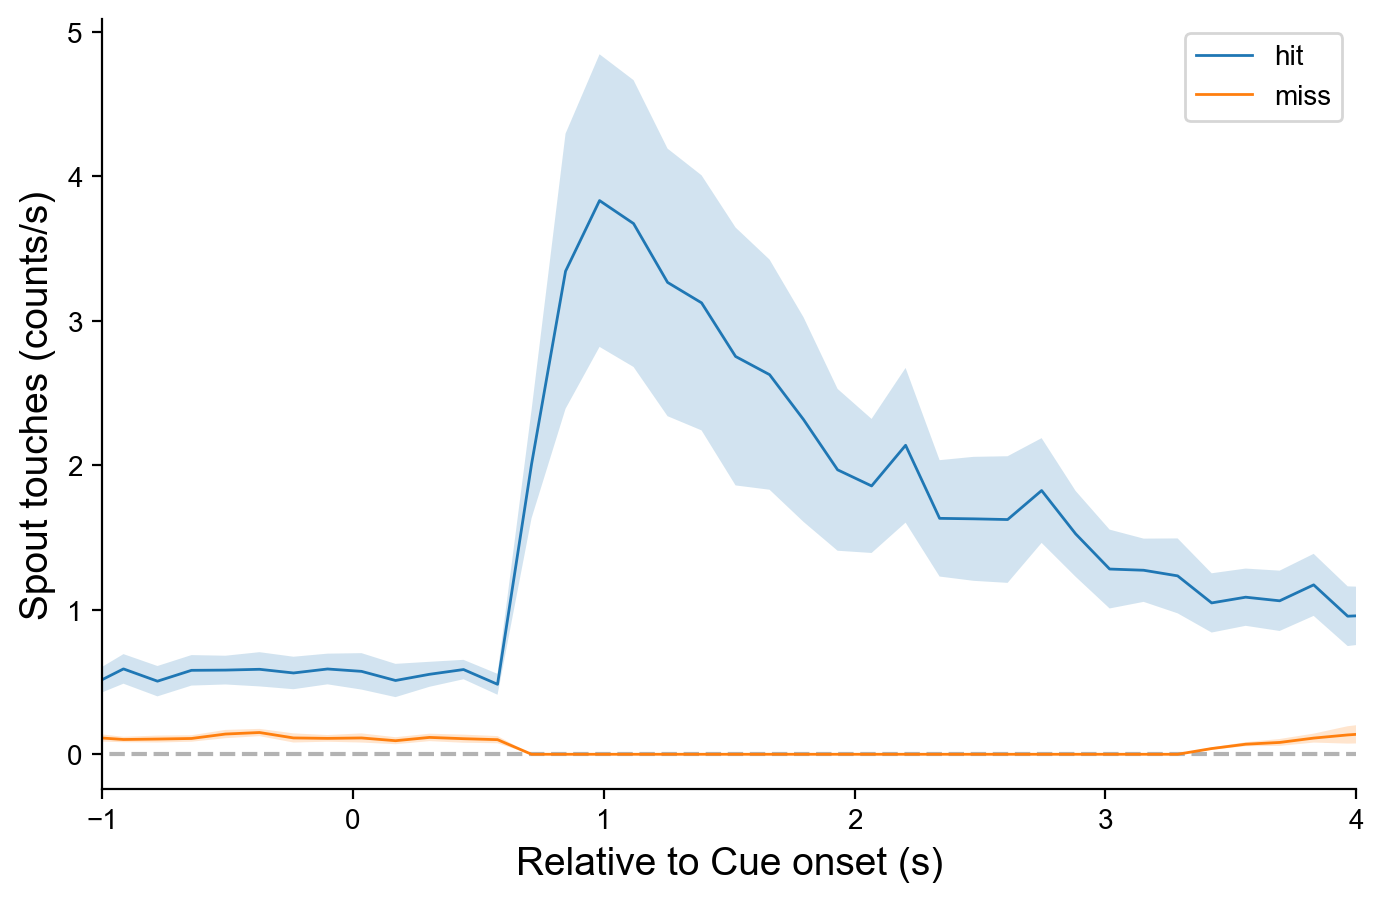

In [18]:
import trialexp.utils.pycontrol_utilities as pycutl

dist_as_continuous.set_trial_window([-2, 6], 's')

figs, axs, df1 = dist_as_continuous.lineplot(
    vars = [ 'spout_dist'],
    time_lim = [-1,4],
    time_unit='s',
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = pycutl.cmap10(),
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5*1.618, 5),
    dpi = 200,
    verbose = False)


axs[0, 0].set_xlabel('Relative to Cue onset (s)', fontsize=14) #TODO not sure
axs[0, 0].set_ylabel('Spout touches (counts/s)', fontsize=14) #TODO not sure
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Success Rate computation

65 ms window for spout touch

df_events.spout_trial_time < 65

`Session.compute_success()` does this

and is inherited to `ev_dataset.meatadata_df` and `ev_dataset.data`





In [114]:

ev_dataset.data



        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time
0,6561,CS_Go,True,False,[],[],[]
1,16984,CS_Go,True,False,[],[],[]
2,27556,CS_Go,True,False,[],[],[]
3,40645,CS_Go,True,False,[],[],[]
4,55306,CS_Go,True,False,[],[],[]
...,...,...,...,...,...,...,...
23805,1392728,CS_Go,True,False,"[390, 556]","[320, 541]",[]
23806,1400795,CS_Go,True,False,"[152, 179, 6677]","[136, 167, 6643]",[]
23807,1414360,CS_Go,True,False,[204],"[181, 3496]",[]
23808,1433595,CS_Go,True,False,"[1482, 3105, 3191]","[1427, 1675, 3169]",[]


In [115]:

ev_dataset.metadata_df


,trial_nb,trigger,success,valid,condition_ID,condition,group_ID,session_nb,subject_ID,keep,trial_ID
0,1,CS_Go,False,True,1,miss,0,1,41,True,0
1,2,CS_Go,False,True,1,miss,0,1,41,True,1
2,3,CS_Go,False,True,1,miss,0,1,41,True,2
3,4,CS_Go,False,True,1,miss,0,1,41,True,3
4,5,CS_Go,False,True,1,miss,0,1,41,True,4
...,...,...,...,...,...,...,...,...,...,...,...
23805,167,CS_Go,False,True,1,miss,0,22,53,True,23805
23806,168,CS_Go,False,True,1,miss,0,22,53,True,23806
23807,169,CS_Go,False,True,1,miss,0,22,53,True,23807
23808,171,CS_Go,False,True,1,miss,0,22,53,True,23808


In [128]:

metadata_df = ev_dataset.metadata_df.loc[ev_dataset.metadata_df['keep'] & ev_dataset.metadata_df['valid'], :]

metadata_df.shape

(23810, 11)

In [ ]:

session_nbs = list(set(metadata_df['session_nb']))


print(group_Isession_nbsDs)


In [213]:

from numpy import NaN


group_IDs = list(set(metadata_df['group_ID']))

for g in group_IDs:
  subject_IDs = list(set(metadata_df.loc[metadata_df.group_ID == g, 'subject_ID']))

  ss_dfs = [0] * len(subject_IDs)
  for s_idx, s in enumerate(subject_IDs):
    session_nbs = list(set(metadata_df.loc[
      (metadata_df['group_ID'] == g)
      & (metadata_df['subject_ID'] == s) , 
      'session_nb']))

    ss_sc = [NaN] * len(session_nbs)
    ss_tn = [NaN] * len(session_nbs)
    ss_sr = [NaN] *  len(session_nbs)
   
    for ss_idx, ss in enumerate(session_nbs):
      ss_sc[ss_idx] = np.count_nonzero(metadata_df.loc[
        (metadata_df['group_ID'] == g)
        & (metadata_df['subject_ID'] == s)
        & (metadata_df['session_nb'] == ss),
        'success'])

      ss_tn[ss_idx] = len(metadata_df.loc[
        (metadata_df['group_ID'] == g)
        & (metadata_df['subject_ID'] == s)
        & (metadata_df['session_nb'] == ss),
        'success'])       

    ss_sr = (np.array(ss_sc)/np.array(ss_tn)).tolist()

    ss_df = pd.DataFrame(list(zip(session_nbs, ss_sc, ss_tn, ss_sr)))
    ss_df.columns = ['session_nb','success_n','trial_n', 'success_rate']

    ss_df.astype({'session_nb':'int', 'success_n': 'int', 'trial_n' : 'int'})

    ss_df['subject_ID'] = pd.Series([s] * len(session_nbs))

    ss_dfs[s_idx] = ss_df

ss_dfs = pd.concat(ss_dfs)
gr_df = pd.DataFrame(list(zip([g] * len(subject_IDs), subject_IDs)),
                     columns=['group_ID', 'subject_ID'])

gr_df = pd.merge(gr_df, ss_dfs, 'outer')
  




In [211]:


ss_dfs

,session_nb,success_n,trial_n,success_rate,subject_ID
0,1,0,66,0.000000,41
1,2,30,127,0.236220,41
2,3,0,159,0.000000,41
3,4,72,184,0.391304,41
4,5,54,191,0.282723,41
...,...,...,...,...,...
10,18,41,176,0.232955,53
11,19,38,95,0.400000,53
12,20,28,201,0.139303,53
13,21,101,172,0.587209,53


In [214]:
gr_df


,group_ID,subject_ID,session_nb,success_n,trial_n,success_rate
0,0,41,1,0,66,0.000000
1,0,41,2,30,127,0.236220
2,0,41,3,0,159,0.000000
3,0,41,4,72,184,0.391304
4,0,41,5,54,191,0.282723
...,...,...,...,...,...,...
164,0,53,18,41,176,0.232955
165,0,53,19,38,95,0.400000
166,0,53,20,28,201,0.139303
167,0,53,21,101,172,0.587209


In [209]:
ss_dfs



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [201]:

ss_df = pd.DataFrame(list(zip(session_nbs, ss_sc, ss_tn, ss_sr)))
ss_df.columns = ['session_nb', 'success_n', 'trial_n', 'success_rate']

ss_df.astype({'session_nb': 'int', 'success_n': 'int', 'trial_n': 'int'})

ss_df['subject_ID'] = pd.Series([s] * len(session_nbs))

ss_df


,session_nb,success_n,trial_n,success_rate,subject_ID
0,1,0,49,0.000000,53
1,2,49,87,0.563218,53
2,3,1,93,0.010753,53
3,4,6,170,0.035294,53
4,5,8,172,0.046512,53
5,6,107,179,0.597765,53
6,7,47,184,0.255435,53
7,14,52,184,0.282609,53
8,16,59,176,0.335227,53
9,17,8,136,0.058824,53


In [191]:
ss_df = pd.DataFrame(list(zip([session_nbs, ss_sc, ss_tn, ss_sr])))
ss_df


,0
0,"[1, 2, 3, 4, 5, 6, 7, 14, 16, 17, 18, 19, 20, ..."
1,"[0, 49, 1, 6, 8, 107, 47, 52, 59, 8, 41, 38, 2..."
2,"[49, 87, 93, 170, 172, 179, 184, 184, 176, 136..."
3,"[0.0, 0.5632183908045977, 0.010752688172043012..."


In [170]:

np.asarray(session_nbs)


array([ 1,  2,  3,  4,  5,  6,  7, 14, 16, 17, 18, 19, 20, 21, 22])

In [ ]:

np.count_nonzero(metadata_df.loc[
    (metadata_df['group_ID'] == g)
    & (metadata_df['subject_ID'] == s)
    & (metadata_df['session_nb'] == ss),
    'success'])



In [ ]:

np.count_nonzero(ev_dataset.metadata_df['success'])


In [113]:
dist_as_continuous.data


array([[[0.33333333, 0.        , 0.66666667, ..., 0.66666667,
         1.        , 0.33333333],
        [0.        , 0.        , 1.33333333, ..., 1.        ,
         1.        , 0.        ],
        [0.        , 0.        , 0.66666667, ..., 0.66666667,
         0.66666667, 0.        ]],

       [[0.13888889, 0.        , 0.13888889, ..., 0.69444444,
         0.13888889, 0.27777778],
        [0.13888889, 0.13888889, 0.13888889, ..., 0.55555556,
         0.        , 0.41666667],
        [0.13888889, 0.        , 0.13888889, ..., 0.41666667,
         0.13888889, 0.55555556]],

       [[0.18518519, 0.        , 0.        , ..., 0.        ,
         0.74074074, 0.55555556],
        [0.37037037, 0.18518519, 0.        , ..., 0.        ,
         0.37037037, 0.55555556],
        [0.18518519, 0.        , 0.        , ..., 0.37037037,
         0.74074074, 0.55555556]],

       ...,

       [[0.        , 0.        , 0.        , ..., 0.05780347,
         0.        , 0.        ],
        [0.        , 

In [111]:
l1 = pycutl.get_methods(ev_dataset)

l2 = pycutl.get_methods(dist_as_continuous)

print(set(l1) - set(l2))

print(set(l2) - set(l1))



        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment
['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'compute_distribution', 'export', 'filter_min', 'filter_reset', 'filterout_conditions', 'filterout_dates', 'filterout_groups', 'filterout_if_not_in_all_cond', 'filterout_subjects', 'get_groups', 'get_memory_size', 'get_session_files', 'raster', 'save', 'set_conditions', 'set_groups', 'set_trial_window']
['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__s

In [109]:
pycutl.get_methods(dist_as_continuous)


['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'export', 'export_to_sktime', 'filter_min', 'filter_reset', 'filterout_conditions', 'filterout_dates', 'filterout_groups', 'filterout_if_not_in_all_cond', 'filterout_subjects', 'get_col_names', 'get_groups', 'get_memory_size', 'get_session_files', 'get_time_vector', 'lineplot', 'save', 'scatterplot', 'set_conditions', 'set_fs', 'set_groups', 'set_trial_window', 'transform_variables']


['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'export',
 'export_to_sktime',
 'filter_min',
 'filter_reset',
 'filterout_conditions',
 'filterout_dates',
 'filterout_groups',
 'filterout_if_not_in_all_cond',
 'filterout_subjects',
 'get_col_names',
 'get_groups',
 'get_memory_size',
 'get_session_files',
 'get_time_vector',
 'lineplot',
 'save',
 'scatterplot',
 'set_conditions',
 'set_fs',
 'set_groups',
 'set_trial_window',
 'transform_variables']

In [107]:
vars(dist_as_continuous)


        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


{'data': array([[[0.33333333, 0.        , 0.66666667, ..., 0.66666667,
          1.        , 0.33333333],
         [0.        , 0.        , 1.33333333, ..., 1.        ,
          1.        , 0.        ],
         [0.        , 0.        , 0.66666667, ..., 0.66666667,
          0.66666667, 0.        ]],
 
        [[0.13888889, 0.        , 0.13888889, ..., 0.69444444,
          0.13888889, 0.27777778],
         [0.13888889, 0.13888889, 0.13888889, ..., 0.55555556,
          0.        , 0.41666667],
         [0.13888889, 0.        , 0.13888889, ..., 0.41666667,
          0.13888889, 0.55555556]],
 
        [[0.18518519, 0.        , 0.        , ..., 0.        ,
          0.74074074, 0.55555556],
         [0.37037037, 0.18518519, 0.        , ..., 0.        ,
          0.37037037, 0.55555556],
         [0.18518519, 0.        , 0.        , ..., 0.37037037,
          0.74074074, 0.55555556]],
 
        ...,
 
        [[0.        , 0.        , 0.        , ..., 0.05780347,
          0.        , 0

In [99]:

s.datetime

s.datetime_string

s.file_name

s.task_name

s.subject_ID


50

In [82]:
type(exp_cohort.sessions[1].events[90])


trialexp.process.data_import.Event

In [22]:
exp_cohort.sessions[1].df_events.tail(20)




,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time
trial_nb,,,,,,,
62,748702,CS_Go,True,False,[],[],[]
63,761176,CS_Go,True,False,[],[],[]
64,772316,CS_Go,True,False,[],[],[]
65,784605,CS_Go,True,False,[],[],[]
66,795664,CS_Go,True,False,[],[],[]
67,807837,CS_Go,True,False,[],[],[]
68,819770,CS_Go,True,False,[],[],[]
69,832042,CS_Go,True,False,[],[],[]
70,842206,CS_Go,True,False,[],[],[]


In [49]:

exp_cohort.sessions[1].df_events.head(50)

realsuccess_n = np.zeros((len(exp_cohort.sessions), 1))
trial_n = np.zeros((len(exp_cohort.sessions), 1))
successrate = np.zeros((len(exp_cohort.sessions), 1))

for s_idx, s in enumerate( exp_cohort.sessions):
    realsuccess_tf = np.full((s.df_events.shape[0], 1), False)
    for r in range(0, s.df_events.shape[0]):
      if s.df_events.loc[r+1,'spout_trial_time']:
        if any(x > 65 for x in s.df_events.loc[r+1, 'spout_trial_time']):
          realsuccess_tf[r] = True

    realsuccess_n[s_idx] = np.count_nonzero(realsuccess_tf)
    trial_n[s_idx] = s.df_events.shape[0]
    successrate[s_idx] = realsuccess_n[s_idx]/trial_n[s_idx]

df_success = pd.DataFrame(np.hstack([realsuccess_n, trial_n, successrate]))
df_success.columns = ['realsuccess_n', 'trial_n', 'success_rate']


del realsuccess_n, trial_n, successrate #, s_idx, s, r
#TODO otther columns, animal, date, task etc


In [57]:
s.df_conditions


,trigger,success,valid
trial_nb,,,
1,CS_Go,False,True
2,CS_Go,False,True
3,CS_Go,False,True
4,CS_Go,False,True
5,CS_Go,False,True
...,...,...,...
198,CS_Go,False,True
199,CS_Go,True,True
200,CS_Go,False,True


## Set DeepLabCut bodyparts to compute paws centroids

In [158]:
# Name of the labelled body parts from both upper limbs
# The bodyparts from which we draw here are user-defined
# when creating a new DeepLabCut project (config.yaml)

L_paw_parts  = ['MCP II', 'MCP III', 'MCP IV', 'MCP V', 'IP II', 'IP III', \
    'IP IV', 'IP V', 'tip II', 'tip III', 'tip IV', 'tip V'] 

R_paw_parts = ['r MCP II', 'r MCP III', 'r MCP IV', 'r MCP V', 'r IP II', \
    'r IP III', 'r IP IV', 'r IP V', 'r tip II', 'r tip III', 'r tip IV', 'r tip V']

names_of_ave_regions = ['Left_paw','Right_paw']

### Extract DeepLabCut trials and create a Continuous_Dataset

In [ ]:
cont_dataset = exp_cohort.get_deeplabcut_groups(
        groups = None,
        conditions_list = condition_list,
        cond_aliases = cond_aliases,
        when='all', 
        task_names = ['reaching_go_nogo'],
        bodyparts_to_ave = [L_paw_parts, R_paw_parts],
        names_of_ave_regions = ['Left_paw','Right_paw'], 
        bodyparts_to_store = ['spout', 'jaw', 'ear', 'tongue', 'tip III',  'IP III', 'MCP III'],
        normalize_between = ['Left_paw', 'spout'],
        bins_nb = 100,
        three_dims = False, 
        p_thresh = 0.9,
        camera_fps = 100, # not yet functional
        camera_keyword = 'Side', 
        trig_on_ev = None, 
        verbose = True)


### Save DLC Dataset

In [338]:
folder_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs'

cont_dataset.save(folder_path, 'DLC_dataset_gonogo')

PicklingError: Can't pickle <class 'trial_dataset_classes.Continuous_Dataset'>: it's not the same object as trial_dataset_classes.Continuous_Dataset

### Reload a pre-existing dataset

In [110]:
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs\DLC_dataset_opto_continuous_full.pkl'
cont_dataset = load_dataset(dataset_full_path)

In [111]:
cont_dataset.metadata_df

,subject_ID,datetime,task_name,condition_ID,trial_nb,session_nb,group_ID,keep,trial_ID
0,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,8,34,0,False,0
1,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,11,34,0,False,1
2,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,12,34,0,False,2
3,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,19,34,0,False,3
4,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,22,34,0,False,4
...,...,...,...,...,...,...,...,...,...
9114,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,60,37,2,False,9114
9115,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,64,37,2,False,9115
9116,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,142,37,2,False,9116
9117,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,144,37,2,False,9117


### Optional methods

In [374]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
cont_dataset.filter_conditions([])

# exclude some groups by IDs
cont_dataset.filter_groups([])

# exclude some subjects
cont_dataset.filter_subjects([0, 1,289,299,305,306])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
cont_dataset.filter_min(min_trials = 10)

# To remove subjects who do not have
# trials in all the conditions
# cont_dataset.filter_if_not_in_all_cond()

# method to build (not finished)
# cont_dataset.set_groups()


In [375]:
%load_ext autoreload
%autoreload 2

from trial_dataset_classes import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 conditions Int64Index([0, 1, 2, 3], dtype='int64', name='condition_ID') groups Int64Index([0], dtype='int64', name='group_ID')


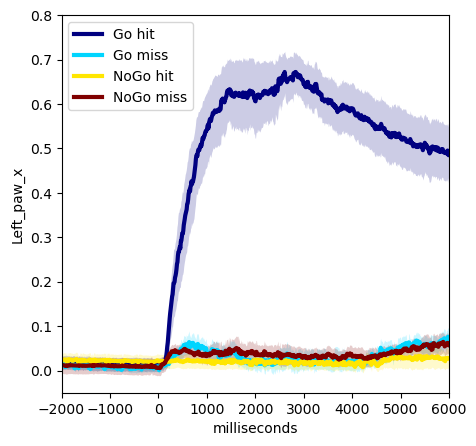

True     2800
False     628
Name: keep, dtype: int64

In [378]:
### Plot the photometry by condition
cont_dataset.set_trial_window([-2, 6], 's')
cont_dataset.set_conditions(condition_list, cond_aliases)
cont_dataset.lineplot(
    vars = ['Left_paw_x'],
    time_lim = [-2000, 6000],
    time_unit = 'milliseconds',
    error = True,
    ylim = [[-0.05, 0.8]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5,5),
    dpi = 100,
    verbose = False)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()


In [ ]:
%load_ext autoreload
%autoreload 2
cont_dataset.set_groups(groups)

In [276]:
cont_dataset.metadata_df.keep[cont_dataset.metadata_df.subject_ID == 307].value_counts()

True     308
False    233
Name: keep, dtype: int64

In [177]:
for row in cont_dataset.metadata_df.itertuples():
    print(row.group_ID)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [171]:
row

Pandas(Index=0, subject_ID=0, datetime=Timestamp('2021-11-18 14:37:48'), task_name='reaching_go_nogo_opto_continuous', condition_ID=0, trial_nb=4, session_nb=160, group_ID=0, keep=False, trial_ID=0)

In [172]:
row.subject_ID

0